In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

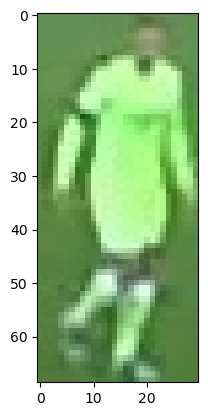

In [4]:
plt.imshow(image)
plt.show()

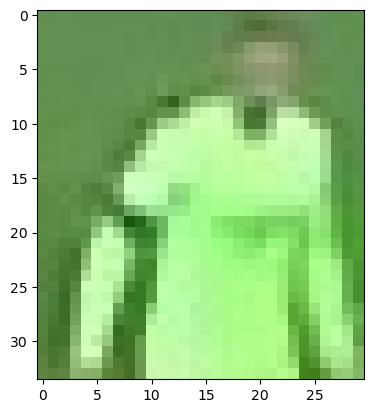

In [5]:
# take top half of image

imgTopHalf = image[0:int(image.shape[0]/2), :]
plt.imshow(imgTopHalf)
plt.show()

In [17]:
# cluster image into two, to isolate the t shirt from the background
# image is converted to a 2-D array

image_2d = imgTopHalf.reshape(-1, 3)
# perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)


/Users/amol/Documents/devspace/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


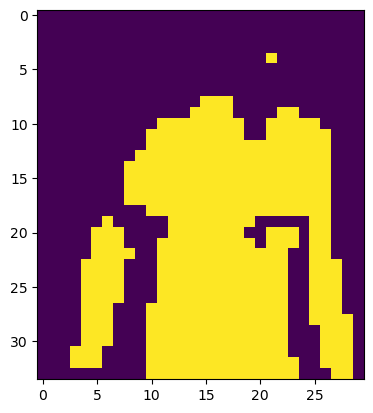

In [18]:

# get cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(imgTopHalf.shape[0], imgTopHalf.shape[1])

# display the clustered image

plt.imshow(clustered_image)
plt.show()

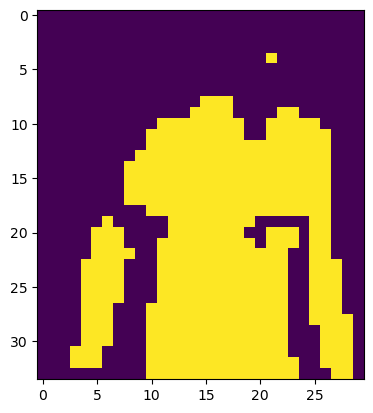

In [19]:

# get cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image = labels.reshape(imgTopHalf.shape[0], imgTopHalf.shape[1])

# display the clustered image

plt.imshow(clustered_image)
plt.show()

In [22]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,1]]

non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

0


In [21]:
player_cluster = 1 - non_player_cluster 
print(player_cluster)

1


In [23]:
# this will give the color of the player outline
kmeans.cluster_centers_[player_cluster]

array([175.88275862, 244.67586207, 149.96321839])